# CE49X Week 06: Statistical Analysis I - Code Examples

**Instructor:** Dr. Eyuphan Koc  
**Institution:** Bogazici University  
**Semester:** Fall 2025

This notebook provides Python implementations and examples for the core topics in statistical analysis covered in Lecture 06.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, uniform, expon, binom, poisson, bernoulli, hypergeom, geom
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# For reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


---
## Section 1: Descriptive Statistics

We'll analyze a dataset of concrete compressive strengths from material testing.

In [3]:
# Generate synthetic concrete strength data (MPa)
np.random.seed(42)
concrete_strength = np.random.normal(loc=35, scale=3.8, size=50)

# Create a DataFrame for easier manipulation
df = pd.DataFrame({'Strength (MPa)': concrete_strength})

print("First 10 measurements:")
print(df.head(10))
print(f"\nTotal samples: {len(df)}")

First 10 measurements:
   Strength (MPa)
0       36.887514
1       34.474596
2       37.461216
3       40.787513
4       34.110217
5       34.110280
6       41.001009
7       37.916252
8       33.215997
9       37.061728

Total samples: 50


### Measures of Central Tendency

In [4]:
# Calculate measures of central tendency
mean_strength = df['Strength (MPa)'].mean()
median_strength = df['Strength (MPa)'].median()
mode_strength = df['Strength (MPa)'].mode().values

print("=" * 50)
print("MEASURES OF CENTRAL TENDENCY")
print("=" * 50)
print(f"Mean:   {mean_strength:.2f} MPa")
print(f"Median: {median_strength:.2f} MPa")
print(f"Mode:   {mode_strength if len(mode_strength) > 0 else 'No unique mode'}")

# Interpretation
print("\nInterpretation:")
if abs(mean_strength - median_strength) < 0.5:
    print("Mean ≈ Median suggests a symmetric distribution")
elif mean_strength > median_strength:
    print("Mean > Median suggests right-skewed distribution")
else:
    print("Mean < Median suggests left-skewed distribution")

MEASURES OF CENTRAL TENDENCY
Mean:   34.14 MPa
Median: 34.11 MPa
Mode:   [27.55325353 27.72953507 28.30044741 28.44531224 29.38161644 29.58595689
 29.63324593 29.95289301 30.36079413 30.62622441 30.98069847 31.15124174
 31.54950851 32.26459201 32.71351487 32.71757298 32.86330739 32.93134565
 33.21599733 33.23022694 33.23901277 33.24957267 33.85580596 33.89156375
 34.11021718 34.11027956 34.14205006 34.47459566 34.56053653 34.94871055
 35.25660718 35.42150584 35.65119947 35.7480727  35.79368166 35.91945663
 36.19413986 36.3057495  36.42765247 36.88751378 37.06172817 37.46121644
 37.806173   37.91625197 38.12567067 39.01706446 40.56946532 40.78751345
 41.0010087  42.0386571 ]

Interpretation:
Mean ≈ Median suggests a symmetric distribution


### Measures of Spread

In [5]:
# Calculate measures of spread
range_strength = df['Strength (MPa)'].max() - df['Strength (MPa)'].min()
variance_strength = df['Strength (MPa)'].var(ddof=1)  # ddof=1 for sample variance
std_strength = df['Strength (MPa)'].std(ddof=1)
q1 = df['Strength (MPa)'].quantile(0.25)
q3 = df['Strength (MPa)'].quantile(0.75)
iqr_strength = q3 - q1

print("=" * 50)
print("MEASURES OF SPREAD")
print("=" * 50)
print(f"Range:                 {range_strength:.2f} MPa")
print(f"Variance:              {variance_strength:.2f} MPa²")
print(f"Standard Deviation:    {std_strength:.2f} MPa")
print(f"Interquartile Range:   {iqr_strength:.2f} MPa")

print("\n" + "=" * 50)
print("FIVE-NUMBER SUMMARY")
print("=" * 50)
print(f"Minimum:  {df['Strength (MPa)'].min():.2f} MPa")
print(f"Q1:       {q1:.2f} MPa")
print(f"Median:   {median_strength:.2f} MPa")
print(f"Q3:       {q3:.2f} MPa")
print(f"Maximum:  {df['Strength (MPa)'].max():.2f} MPa")

MEASURES OF SPREAD
Range:                 14.49 MPa
Variance:              12.59 MPa²
Standard Deviation:    3.55 MPa
Interquartile Range:   4.55 MPa

FIVE-NUMBER SUMMARY
Minimum:  27.55 MPa
Q1:       31.73 MPa
Median:   34.11 MPa
Q3:       36.28 MPa
Maximum:  42.04 MPa


### Shape Measures: Skewness and Kurtosis

In [6]:
# Calculate skewness and kurtosis
skewness = df['Strength (MPa)'].skew()
kurtosis = df['Strength (MPa)'].kurtosis()  # Pandas uses excess kurtosis by default

print("=" * 50)
print("SHAPE MEASURES")
print("=" * 50)
print(f"Skewness:       {skewness:.4f}")
print(f"Excess Kurtosis: {kurtosis:.4f}")
print(f"Kurtosis:       {kurtosis + 3:.4f}")

print("\nInterpretation:")
if abs(skewness) < 0.5:
    print("- Distribution is approximately symmetric")
elif skewness > 0:
    print("- Distribution is right-skewed (positive skew)")
else:
    print("- Distribution is left-skewed (negative skew)")

if abs(kurtosis) < 0.5:
    print("- Tail behavior similar to Normal distribution")
elif kurtosis > 0:
    print("- Heavy tails (more outliers than Normal)")
else:
    print("- Light tails (fewer outliers than Normal)")

SHAPE MEASURES
Skewness:       0.1402
Excess Kurtosis: -0.3718
Kurtosis:       2.6282

Interpretation:
- Distribution is approximately symmetric
- Tail behavior similar to Normal distribution


### Visualization: Histogram and Boxplot

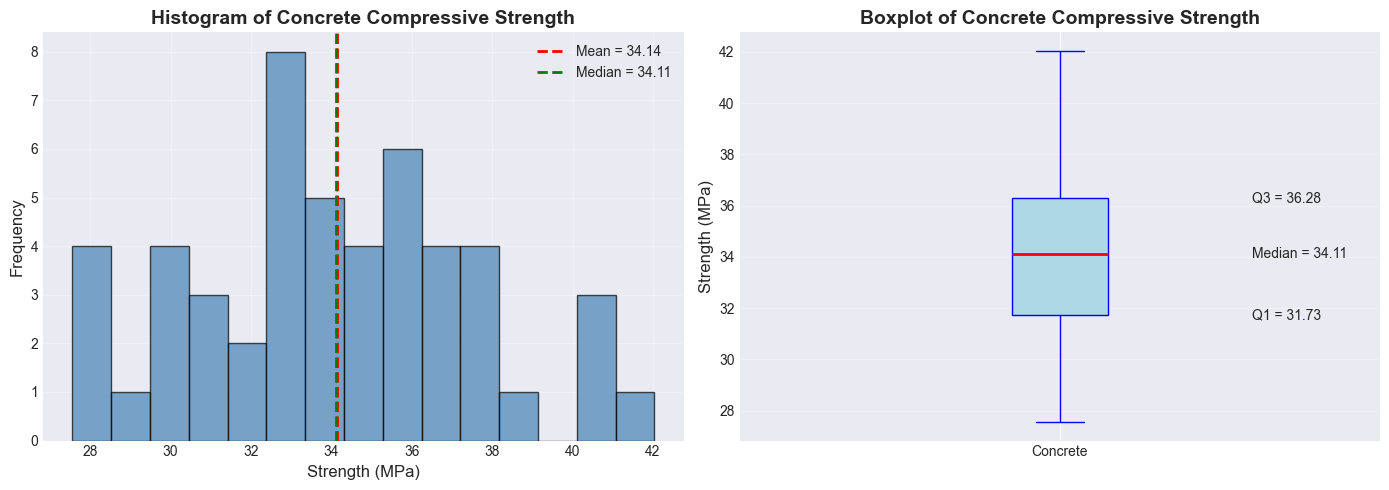


Engineering Interpretation:
- Average strength is 34.14 MPa with std dev of 3.55 MPa
- Middle 50% of samples have strength between 31.73 and 36.28 MPa
- Quality control: Check if mean meets design specifications


In [7]:
# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Strength (MPa)'], bins=15, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(mean_strength, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_strength:.2f}')
axes[0].axvline(median_strength, color='green', linestyle='--', linewidth=2, label=f'Median = {median_strength:.2f}')
axes[0].set_xlabel('Strength (MPa)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Histogram of Concrete Compressive Strength', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
bp = axes[1].boxplot(df['Strength (MPa)'], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      whiskerprops=dict(color='blue'),
                      capprops=dict(color='blue'),
                      medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Strength (MPa)', fontsize=12)
axes[1].set_title('Boxplot of Concrete Compressive Strength', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Concrete'])
axes[1].grid(alpha=0.3, axis='y')

# Add annotations to boxplot
axes[1].text(1.3, q1, f'Q1 = {q1:.2f}', verticalalignment='center', fontsize=10)
axes[1].text(1.3, median_strength, f'Median = {median_strength:.2f}', verticalalignment='center', fontsize=10)
axes[1].text(1.3, q3, f'Q3 = {q3:.2f}', verticalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nEngineering Interpretation:")
print(f"- Average strength is {mean_strength:.2f} MPa with std dev of {std_strength:.2f} MPa")
print(f"- Middle 50% of samples have strength between {q1:.2f} and {q3:.2f} MPa")
print(f"- Quality control: Check if mean meets design specifications")

---
## Section 2: Probability Review

Examples demonstrating basic probability concepts, conditional probability, and Bayes' theorem.

In [8]:
# Example: Quality Control with Two Suppliers
print("=" * 60)
print("EXAMPLE: Quality Control with Two Suppliers")
print("=" * 60)

# Given data
P_S1 = 0.60  # Probability from Supplier 1
P_S2 = 0.40  # Probability from Supplier 2
P_D_given_S1 = 0.02  # P(Defective | Supplier 1)
P_D_given_S2 = 0.05  # P(Defective | Supplier 2)

print(f"\nGiven:")
print(f"  P(Supplier 1) = {P_S1}")
print(f"  P(Supplier 2) = {P_S2}")
print(f"  P(Defective | Supplier 1) = {P_D_given_S1}")
print(f"  P(Defective | Supplier 2) = {P_D_given_S2}")

# Law of Total Probability: P(Defective)
P_D = P_D_given_S1 * P_S1 + P_D_given_S2 * P_S2
print(f"\nLaw of Total Probability:")
print(f"  P(Defective) = {P_D_given_S1} × {P_S1} + {P_D_given_S2} × {P_S2}")
print(f"  P(Defective) = {P_D:.4f} = {P_D*100:.2f}%")

# Bayes' Theorem: P(Supplier 1 | Defective)
P_S1_given_D = (P_D_given_S1 * P_S1) / P_D
P_S2_given_D = (P_D_given_S2 * P_S2) / P_D

print(f"\nBayes' Theorem:")
print(f"  P(Supplier 1 | Defective) = {P_S1_given_D:.4f} = {P_S1_given_D*100:.2f}%")
print(f"  P(Supplier 2 | Defective) = {P_S2_given_D:.4f} = {P_S2_given_D*100:.2f}%")

print(f"\nInterpretation:")
print(f"  If a component is found defective, there's a {P_S2_given_D*100:.1f}% chance")
print(f"  it came from Supplier 2 (despite Supplier 2 providing only 40% of parts)")

EXAMPLE: Quality Control with Two Suppliers

Given:
  P(Supplier 1) = 0.6
  P(Supplier 2) = 0.4
  P(Defective | Supplier 1) = 0.02
  P(Defective | Supplier 2) = 0.05

Law of Total Probability:
  P(Defective) = 0.02 × 0.6 + 0.05 × 0.4
  P(Defective) = 0.0320 = 3.20%

Bayes' Theorem:
  P(Supplier 1 | Defective) = 0.3750 = 37.50%
  P(Supplier 2 | Defective) = 0.6250 = 62.50%

Interpretation:
  If a component is found defective, there's a 62.5% chance
  it came from Supplier 2 (despite Supplier 2 providing only 40% of parts)


In [ ]:
# Example: Diagnostic Testing for Structural Damage
print("\n" + "=" * 60)
print("EXAMPLE: Diagnostic Testing for Structural Damage")
print("=" * 60)

# Given data
sensitivity = 0.95  # P(+ | Damage) - True Positive Rate
specificity = 0.90  # P(- | No Damage) - True Negative Rate
prevalence = 0.05   # P(Damage)

P_positive_given_damage = sensitivity
P_negative_given_no_damage = specificity
P_positive_given_no_damage = 1 - specificity  # False Positive Rate
P_damage = prevalence
P_no_damage = 1 - prevalence

print(f"\nGiven:")
print(f"  Sensitivity = {sensitivity} (P(+ | Damage))")
print(f"  Specificity = {specificity} (P(- | No Damage))")
print(f"  Prevalence = {prevalence} (P(Damage))")

# P(Positive Test)
P_positive = P_positive_given_damage * P_damage + P_positive_given_no_damage * P_no_damage

print(f"\nP(Positive Test) = {P_positive:.4f}")

# Bayes' Theorem: P(Damage | Positive)
P_damage_given_positive = (P_positive_given_damage * P_damage) / P_positive

print(f"\nBayes' Theorem:")
print(f"  P(Damage | Positive Test) = {P_damage_given_positive:.4f} = {P_damage_given_positive*100:.2f}%")

print(f"\nInterpretation:")
print(f"  Even with a positive test (95% sensitivity), the probability of actual")
print(f"  damage is only {P_damage_given_positive*100:.1f}% due to low prevalence!")
print(f"  This is why additional testing is often needed.")

---
## Section 3: Discrete Random Variables and Distributions

Working with Bernoulli, Binomial, Hypergeometric, and Poisson distributions.

### Bernoulli Distribution

In [ ]:
# Bernoulli: Single component test
p = 0.95  # Probability of passing inspection

# Create Bernoulli distribution
bern_dist = bernoulli(p)

print("=" * 60)
print("BERNOULLI DISTRIBUTION")
print("=" * 60)
print(f"\nComponent passes inspection with probability p = {p}")
print(f"\nPMF:")
print(f"  P(X = 0) = {bern_dist.pmf(0):.4f}")
print(f"  P(X = 1) = {bern_dist.pmf(1):.4f}")
print(f"\nExpected Value: E[X] = {bern_dist.mean():.4f}")
print(f"Variance: Var(X) = {bern_dist.var():.4f}")
print(f"Standard Deviation: SD(X) = {bern_dist.std():.4f}")

# Simulate 1000 trials
samples = bern_dist.rvs(size=1000)
print(f"\nSimulation of 1000 trials:")
print(f"  Successes: {np.sum(samples)} ({np.mean(samples)*100:.1f}%)")
print(f"  Failures: {1000 - np.sum(samples)} ({(1-np.mean(samples))*100:.1f}%)")

### Binomial Distribution

In [ ]:
# Binomial: Testing multiple components
n = 20  # Number of trials
p = 0.95  # Probability of success

# Create Binomial distribution
binom_dist = binom(n, p)

print("=" * 60)
print("BINOMIAL DISTRIBUTION")
print("=" * 60)
print(f"\nTesting {n} components, each passes with probability {p}")
print(f"\nExpected Value: E[X] = np = {binom_dist.mean():.2f}")
print(f"Variance: Var(X) = np(1-p) = {binom_dist.var():.2f}")
print(f"Standard Deviation: SD(X) = {binom_dist.std():.2f}")

print(f"\nProbabilities:")
print(f"  P(X = 20) = P(all pass) = {binom_dist.pmf(20):.4f}")
print(f"  P(X = 19) = {binom_dist.pmf(19):.4f}")
print(f"  P(X ≥ 19) = {1 - binom_dist.cdf(18):.4f}")
print(f"  P(X ≥ 18) = {1 - binom_dist.cdf(17):.4f}")

# Visualization
x_values = np.arange(0, n+1)
pmf_values = binom_dist.pmf(x_values)

plt.figure(figsize=(12, 5))

# PMF
plt.subplot(1, 2, 1)
plt.bar(x_values, pmf_values, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(binom_dist.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {binom_dist.mean():.2f}')
plt.xlabel('Number of Successes (k)', fontsize=12)
plt.ylabel('Probability P(X = k)', fontsize=12)
plt.title(f'Binomial PMF: n={n}, p={p}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# CDF
plt.subplot(1, 2, 2)
cdf_values = binom_dist.cdf(x_values)
plt.step(x_values, cdf_values, where='post', color='darkgreen', linewidth=2)
plt.xlabel('k', fontsize=12)
plt.ylabel('Cumulative Probability P(X ≤ k)', fontsize=12)
plt.title(f'Binomial CDF: n={n}, p={p}', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Hypergeometric Distribution

In [ ]:
# Hypergeometric: Sampling without replacement
N = 100  # Total population
K = 5    # Number of defective items
n = 10   # Sample size

# Create Hypergeometric distribution
hypergeom_dist = hypergeom(N, K, n)

print("=" * 60)
print("HYPERGEOMETRIC DISTRIBUTION")
print("=" * 60)
print(f"\nBatch of {N} parts, {K} are defective")
print(f"Sample {n} parts without replacement")
print(f"\nExpected Value: E[X] = n(K/N) = {hypergeom_dist.mean():.2f}")
print(f"Variance: Var(X) = {hypergeom_dist.var():.2f}")

print(f"\nProbabilities:")
for k in range(min(K, n) + 1):
    prob = hypergeom_dist.pmf(k)
    print(f"  P(X = {k}) = {prob:.4f}")

print(f"\n  P(X = 0) = P(no defectives) = {hypergeom_dist.pmf(0):.4f}")
print(f"  P(X ≥ 1) = P(at least 1 defective) = {1 - hypergeom_dist.pmf(0):.4f}")

# Visualization
x_values = np.arange(0, min(K, n) + 1)
pmf_values = hypergeom_dist.pmf(x_values)

plt.figure(figsize=(10, 5))
plt.bar(x_values, pmf_values, color='coral', alpha=0.7, edgecolor='black')
plt.axvline(hypergeom_dist.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {hypergeom_dist.mean():.2f}')
plt.xlabel('Number of Defective Items (k)', fontsize=12)
plt.ylabel('Probability P(X = k)', fontsize=12)
plt.title(f'Hypergeometric PMF: N={N}, K={K}, n={n}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Poisson Distribution

In [ ]:
# Poisson: Number of trucks crossing bridge per hour
lambda_rate = 50  # Average rate

# Create Poisson distribution
poisson_dist = poisson(lambda_rate)

print("=" * 60)
print("POISSON DISTRIBUTION")
print("=" * 60)
print(f"\nNumber of trucks crossing bridge per hour")
print(f"Average rate λ = {lambda_rate}")
print(f"\nExpected Value: E[X] = λ = {poisson_dist.mean():.2f}")
print(f"Variance: Var(X) = λ = {poisson_dist.var():.2f}")
print(f"Standard Deviation: SD(X) = √λ = {poisson_dist.std():.2f}")

print(f"\nNote: For Poisson, mean = variance = λ")

print(f"\nProbabilities:")
print(f"  P(X = 50) = {poisson_dist.pmf(50):.4f}")
print(f"  P(X ≤ 40) = {poisson_dist.cdf(40):.4f}")
print(f"  P(X > 60) = {1 - poisson_dist.cdf(60):.4f}")
print(f"  P(45 ≤ X ≤ 55) = {poisson_dist.cdf(55) - poisson_dist.cdf(44):.4f}")

# Visualization
x_values = np.arange(20, 80)
pmf_values = poisson_dist.pmf(x_values)

plt.figure(figsize=(12, 5))

# PMF
plt.subplot(1, 2, 1)
plt.bar(x_values, pmf_values, color='purple', alpha=0.6, edgecolor='black')
plt.axvline(lambda_rate, color='red', linestyle='--', linewidth=2, label=f'λ = {lambda_rate}')
plt.xlabel('Number of Trucks (k)', fontsize=12)
plt.ylabel('Probability P(X = k)', fontsize=12)
plt.title(f'Poisson PMF: λ={lambda_rate}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Comparison with Normal approximation
plt.subplot(1, 2, 2)
plt.bar(x_values, pmf_values, color='purple', alpha=0.4, edgecolor='black', label='Poisson')
x_continuous = np.linspace(20, 80, 1000)
normal_approx = norm.pdf(x_continuous, loc=lambda_rate, scale=np.sqrt(lambda_rate))
plt.plot(x_continuous, normal_approx, 'r-', linewidth=2, label='Normal Approximation')
plt.xlabel('Number of Trucks', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Poisson vs Normal Approximation', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## Section 4: Expectation and Variance Concepts

In [ ]:
# Demonstrating Linearity of Expectation
print("=" * 60)
print("LINEARITY OF EXPECTATION")
print("=" * 60)

# Binomial using linearity
n = 100
p = 0.3

print(f"\nX ~ Binomial(n={n}, p={p})")
print(f"\nUsing linearity: X = X₁ + X₂ + ... + X₁₀₀")
print(f"where each Xᵢ ~ Bernoulli({p})")
print(f"\nE[X] = E[X₁] + E[X₂] + ... + E[X₁₀₀]")
print(f"     = {n} × {p}")
print(f"     = {n * p}")

binom_dist = binom(n, p)
print(f"\nVerification: E[X] = {binom_dist.mean():.2f}")
print(f"Var(X) = {binom_dist.var():.2f}")
print(f"SD(X) = {binom_dist.std():.2f}")

In [ ]:
# LOTUS Example
print("\n" + "=" * 60)
print("LAW OF THE UNCONSCIOUS STATISTICIAN (LOTUS)")
print("=" * 60)

# Die roll example
x_values = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

# E[X]
E_X = np.sum(x_values * probabilities)
print(f"\nDie roll: X ~ Uniform{{1,2,3,4,5,6}}")
print(f"E[X] = {E_X:.4f}")

# E[X²] using LOTUS
E_X_squared = np.sum(x_values**2 * probabilities)
print(f"\nUsing LOTUS for E[X²]:")
print(f"E[X²] = 1²(1/6) + 2²(1/6) + ... + 6²(1/6)")
print(f"E[X²] = {E_X_squared:.4f}")

# Variance
Var_X = E_X_squared - E_X**2
print(f"\nVar(X) = E[X²] - (E[X])²")
print(f"       = {E_X_squared:.4f} - ({E_X:.4f})²")
print(f"       = {Var_X:.4f}")

# E[X³] for demonstration
E_X_cubed = np.sum(x_values**3 * probabilities)
print(f"\nE[X³] = {E_X_cubed:.4f}")

---
## Section 5: Continuous Random Variables and Distributions

### Uniform Distribution

In [ ]:
# Uniform Distribution
a, b = 0, 10  # Interval [a, b]

uniform_dist = uniform(loc=a, scale=b-a)

print("=" * 60)
print("UNIFORM DISTRIBUTION")
print("=" * 60)
print(f"\nX ~ Uniform({a}, {b})")
print(f"\nExpected Value: E[X] = (a+b)/2 = {uniform_dist.mean():.2f}")
print(f"Variance: Var(X) = (b-a)²/12 = {uniform_dist.var():.2f}")

print(f"\nProbabilities:")
print(f"  P(X ≤ 5) = {uniform_dist.cdf(5):.4f}")
print(f"  P(3 ≤ X ≤ 7) = {uniform_dist.cdf(7) - uniform_dist.cdf(3):.4f}")
print(f"  P(X > 8) = {1 - uniform_dist.cdf(8):.4f}")

# Visualization
x = np.linspace(-1, 11, 1000)
pdf = uniform_dist.pdf(x)
cdf = uniform_dist.cdf(x)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF
axes[0].plot(x, pdf, 'b-', linewidth=2, label='PDF')
axes[0].fill_between(x, pdf, alpha=0.3)
axes[0].axvline(uniform_dist.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean = {uniform_dist.mean():.1f}')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title(f'Uniform PDF: [{a}, {b}]', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# CDF
axes[1].plot(x, cdf, 'g-', linewidth=2, label='CDF')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('F(x) = P(X ≤ x)', fontsize=12)
axes[1].set_title(f'Uniform CDF: [{a}, {b}]', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Normal Distribution

In [ ]:
# Normal Distribution
mu = 250  # Mean (MPa)
sigma = 15  # Standard deviation (MPa)

normal_dist = norm(loc=mu, scale=sigma)

print("=" * 60)
print("NORMAL DISTRIBUTION")
print("=" * 60)
print(f"\nSteel yield strength: X ~ N({mu}, {sigma}²) MPa")
print(f"\nExpected Value: E[X] = μ = {normal_dist.mean():.2f} MPa")
print(f"Variance: Var(X) = σ² = {normal_dist.var():.2f}")
print(f"Standard Deviation: SD(X) = σ = {normal_dist.std():.2f} MPa")

print(f"\n68-95-99.7 Rule:")
print(f"  P({mu-sigma:.1f} ≤ X ≤ {mu+sigma:.1f}) = {normal_dist.cdf(mu+sigma) - normal_dist.cdf(mu-sigma):.4f} ≈ 0.68")
print(f"  P({mu-2*sigma:.1f} ≤ X ≤ {mu+2*sigma:.1f}) = {normal_dist.cdf(mu+2*sigma) - normal_dist.cdf(mu-2*sigma):.4f} ≈ 0.95")
print(f"  P({mu-3*sigma:.1f} ≤ X ≤ {mu+3*sigma:.1f}) = {normal_dist.cdf(mu+3*sigma) - normal_dist.cdf(mu-3*sigma):.4f} ≈ 0.997")

print(f"\nProbabilities:")
print(f"  P(X ≤ 250) = {normal_dist.cdf(250):.4f}")
print(f"  P(X > 270) = {1 - normal_dist.cdf(270):.4f}")
print(f"  P(240 ≤ X ≤ 260) = {normal_dist.cdf(260) - normal_dist.cdf(240):.4f}")

# Visualization
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = normal_dist.pdf(x)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF with 68-95-99.7 rule
axes[0].plot(x, pdf, 'b-', linewidth=2, label='PDF')
axes[0].fill_between(x, pdf, where=(x >= mu-sigma) & (x <= mu+sigma), 
                      alpha=0.3, color='blue', label='68% (μ ± σ)')
axes[0].fill_between(x, pdf, where=(x >= mu-2*sigma) & (x <= mu+2*sigma), 
                      alpha=0.2, color='green', label='95% (μ ± 2σ)')
axes[0].axvline(mu, color='red', linestyle='--', linewidth=2, label=f'μ = {mu}')
axes[0].set_xlabel('Yield Strength (MPa)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title(f'Normal PDF: μ={mu}, σ={sigma}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Standard Normal Z-scores
z = np.linspace(-4, 4, 1000)
standard_normal = norm(0, 1)
axes[1].plot(z, standard_normal.pdf(z), 'purple', linewidth=2)
axes[1].fill_between(z, standard_normal.pdf(z), where=(z >= -1) & (z <= 1), 
                      alpha=0.3, color='purple', label='68%')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='μ = 0')
axes[1].set_xlabel('Z-score', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Standard Normal: Z ~ N(0, 1)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Exponential Distribution

In [ ]:
# Exponential Distribution
lambda_rate = 0.01  # Rate parameter (per hour)

exp_dist = expon(scale=1/lambda_rate)  # Note: scipy uses scale = 1/λ

print("=" * 60)
print("EXPONENTIAL DISTRIBUTION")
print("=" * 60)
print(f"\nTime until component failure: X ~ Expo({lambda_rate}) hours")
print(f"\nExpected Value: E[X] = 1/λ = {exp_dist.mean():.2f} hours")
print(f"Variance: Var(X) = 1/λ² = {exp_dist.var():.2f}")
print(f"Standard Deviation: SD(X) = 1/λ = {exp_dist.std():.2f} hours")

print(f"\nProbabilities:")
print(f"  P(X ≤ 100) = {exp_dist.cdf(100):.4f}")
print(f"  P(X > 100) = {1 - exp_dist.cdf(100):.4f} ≈ e⁻¹ = {np.exp(-1):.4f}")
print(f"  P(X > 200) = {1 - exp_dist.cdf(200):.4f}")
print(f"  P(50 ≤ X ≤ 150) = {exp_dist.cdf(150) - exp_dist.cdf(50):.4f}")

print(f"\nMemoryless Property:")
print(f"  P(X > 150 | X > 50) = P(X > 100) = {1 - exp_dist.cdf(100):.4f}")
print(f"  Verification: {(1 - exp_dist.cdf(150))/(1 - exp_dist.cdf(50)):.4f}")

# Visualization
x = np.linspace(0, 400, 1000)
pdf = exp_dist.pdf(x)
cdf = exp_dist.cdf(x)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF
axes[0].plot(x, pdf, 'r-', linewidth=2, label='PDF')
axes[0].fill_between(x, pdf, alpha=0.3, color='red')
axes[0].axvline(exp_dist.mean(), color='blue', linestyle='--', linewidth=2, 
                label=f'Mean = {exp_dist.mean():.1f} hours')
axes[0].set_xlabel('Time (hours)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title(f'Exponential PDF: λ={lambda_rate}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# CDF
axes[1].plot(x, cdf, 'darkgreen', linewidth=2, label='CDF')
axes[1].axhline(0.5, color='gray', linestyle=':', alpha=0.7)
axes[1].axvline(exp_dist.median(), color='orange', linestyle='--', linewidth=2, 
                label=f'Median = {exp_dist.median():.1f} hours')
axes[1].set_xlabel('Time (hours)', fontsize=12)
axes[1].set_ylabel('F(x) = P(X ≤ x)', fontsize=12)
axes[1].set_title(f'Exponential CDF: λ={lambda_rate}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## Section 6: Moments and Moment Generating Functions

In [ ]:
# Computing Moments
print("=" * 60)
print("MOMENTS OF A DISTRIBUTION")
print("=" * 60)

# Use Normal distribution as example
mu = 100
sigma = 15
dist = norm(mu, sigma)

# Generate sample for numerical computation
sample = dist.rvs(size=100000)

# Raw moments
moment1 = np.mean(sample)
moment2 = np.mean(sample**2)
moment3 = np.mean(sample**3)
moment4 = np.mean(sample**4)

print(f"\nNormal({mu}, {sigma}²)")
print(f"\nRaw Moments (about origin):")
print(f"  μ'₁ = E[X] = {moment1:.2f}")
print(f"  μ'₂ = E[X²] = {moment2:.2f}")
print(f"  μ'₃ = E[X³] = {moment3:.2f}")
print(f"  μ'₄ = E[X⁴] = {moment4:.2f}")

# Central moments
mean = moment1
variance = moment2 - mean**2
centered3 = moment3 - 3*mean*moment2 + 2*mean**3
centered4 = moment4 - 4*mean*moment3 + 6*mean**2*moment2 - 3*mean**4

print(f"\nCentral Moments (about mean):")
print(f"  μ₁ = 0 (by definition)")
print(f"  μ₂ = Var(X) = {variance:.2f}")
print(f"  μ₃ = E[(X-μ)³] = {centered3:.2f}")
print(f"  μ₄ = E[(X-μ)⁴] = {centered4:.2f}")

# Skewness and Kurtosis
skewness = stats.skew(sample)
kurtosis_excess = stats.kurtosis(sample, fisher=True)  # Excess kurtosis
kurtosis_raw = kurtosis_excess + 3

print(f"\nStandardized Moments:")
print(f"  Skewness = μ₃/σ³ = {skewness:.4f}")
print(f"  Kurtosis = μ₄/σ⁴ = {kurtosis_raw:.4f}")
print(f"  Excess Kurtosis = {kurtosis_excess:.4f}")

print(f"\nNote: Normal distribution has skewness ≈ 0 and kurtosis ≈ 3")

In [ ]:
# Comparing distributions by their moments
print("\n" + "=" * 60)
print("COMPARING DISTRIBUTIONS BY MOMENTS")
print("=" * 60)

# Generate samples from different distributions
n_samples = 10000
normal_sample = norm(100, 15).rvs(n_samples)
uniform_sample = uniform(70, 60).rvs(n_samples)  # Uniform(70, 130)
exp_sample = expon(scale=100).rvs(n_samples)

distributions = {
    'Normal(100, 15²)': normal_sample,
    'Uniform(70, 130)': uniform_sample,
    'Exponential(λ=0.01)': exp_sample
}

print(f"\n{'Distribution':<25} {'Mean':<12} {'Std Dev':<12} {'Skewness':<12} {'Kurtosis':<12}")
print("-" * 75)

for name, sample in distributions.items():
    mean = np.mean(sample)
    std = np.std(sample)
    skew = stats.skew(sample)
    kurt = stats.kurtosis(sample, fisher=False)  # Raw kurtosis
    print(f"{name:<25} {mean:<12.2f} {std:<12.2f} {skew:<12.4f} {kurt:<12.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (name, sample) in enumerate(distributions.items()):
    # Histogram
    axes[0, idx].hist(sample, bins=50, density=True, alpha=0.7, edgecolor='black')
    axes[0, idx].axvline(np.mean(sample), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[0, idx].set_title(name, fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel('Value')
    axes[0, idx].set_ylabel('Density')
    axes[0, idx].legend()
    axes[0, idx].grid(alpha=0.3)
    
    # Boxplot
    bp = axes[1, idx].boxplot(sample, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue'))
    axes[1, idx].set_title(name, fontsize=12, fontweight='bold')
    axes[1, idx].set_ylabel('Value')
    axes[1, idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Moment Generating Functions - Numerical Verification
print("\n" + "=" * 60)
print("MOMENT GENERATING FUNCTIONS")
print("=" * 60)

# For Poisson distribution
lambda_poisson = 10
poisson_dist = poisson(lambda_poisson)

print(f"\nPoisson(λ={lambda_poisson})")
print(f"\nMGF: M(t) = exp(λ(e^t - 1))")

# Theoretical moments from MGF
print(f"\nTheoretical (from MGF):")
print(f"  E[X] = λ = {lambda_poisson}")
print(f"  E[X²] = λ² + λ = {lambda_poisson**2 + lambda_poisson}")
print(f"  Var(X) = λ = {lambda_poisson}")

# Empirical verification
sample = poisson_dist.rvs(size=100000)
E_X = np.mean(sample)
E_X2 = np.mean(sample**2)
Var_X = np.var(sample)

print(f"\nEmpirical (from simulation):")
print(f"  E[X] = {E_X:.4f}")
print(f"  E[X²] = {E_X2:.4f}")
print(f"  Var(X) = {Var_X:.4f}")

print(f"\nNote: For Poisson, E[X] = Var(X) = λ (unique property!)")

---
## Summary: Key Distributions Reference Table

In [ ]:
# Create a comprehensive reference table
distributions_data = {
    'Distribution': ['Bernoulli', 'Binomial', 'Poisson', 'Geometric', 'Uniform', 'Normal', 'Exponential'],
    'Type': ['Discrete', 'Discrete', 'Discrete', 'Discrete', 'Continuous', 'Continuous', 'Continuous'],
    'Parameters': ['p', 'n, p', 'λ', 'p', 'a, b', 'μ, σ²', 'λ'],
    'Mean': ['p', 'np', 'λ', '1/p', '(a+b)/2', 'μ', '1/λ'],
    'Variance': ['p(1-p)', 'np(1-p)', 'λ', '(1-p)/p²', '(b-a)²/12', 'σ²', '1/λ²'],
    'Use Case': ['Single trial', 'Count successes', 'Rare events', 'Waiting time', 'Equal likelihood', 'Bell curve', 'Waiting time']
}

df_distributions = pd.DataFrame(distributions_data)

print("=" * 90)
print("COMPREHENSIVE DISTRIBUTIONS REFERENCE")
print("=" * 90)
print(df_distributions.to_string(index=False))

print("\n" + "=" * 90)
print("END OF WEEK 06 CODE EXAMPLES")
print("=" * 90)